<a href="https://colab.research.google.com/github/AlgoRex2/graymatter-ml/blob/main/Copy_of_Loan_Approval_Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loan Approval Prediction Using Machine Learning

Analyzing key factors and building models to predict loan approval decisions

In [53]:
# Q1

# Download dataset from Kaggle using kagglehub
# Note: This is needed only for Google Colab or environments without direct Kaggle access

import kagglehub

# Download and store the dataset locally
dataset_path = kagglehub.dataset_download('architsharma01/loan-approval-prediction-dataset')

print('✅ Dataset downloaded successfully.')


Using Colab cache for faster access to the 'loan-approval-prediction-dataset' dataset.
✅ Dataset downloaded successfully.


# 📌 Project Overview: Loan Approval Prediction

## 🎯 Goal

The objective of this project is to analyze historical loan application data and identify key factors that influence whether a loan is approved or rejected.

We will build a Machine Learning model to predict the loan approval status for new applicants.

---

## 📊 Why This Matters

This notebook helps to:

- Understand which features (like income, credit score, and assets) impact loan decisions the most.
- Provide a practical tool for banks and financial institutions to:
  - ⚡ Speed up the approval process
  - 🔒 Minimize risk by estimating approval likelihood
  - 🌳 Improve transparency in decision-making (especially with interpretable models like Decision Trees)


In [52]:
# Q2

# 📦 Import essential libraries

# Core libraries
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation and analysis

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report

# System utilities
import os
import warnings

# Suppress warning messages for cleaner output
warnings.filterwarnings("ignore")

# 📁 Optional: List files in the dataset directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


In [51]:
# Q3

import pandas as pd

try:
    df = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')
    print("Data loaded successfully!")
    print(f"DataFrame shape: {df.shape}")
except Exception as e:
    print("Error loading data:", e)



Data loaded successfully!
DataFrame shape: (4269, 13)


In [50]:
# Q4

try:
    print(df.columns)
except NameError:
    print("DataFrame 'df' is not defined. Please run Q3 to load data first.")


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [22]:
# Q5

#info (int ,float , category)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [49]:
# Q6

# Data Handling & EDA

#show same samples to know (Target columns , Nan value , outliers)
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17050000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
5,6,0,0,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,1
6,7,5,0,0,8700000,33000000,4,678,22500000,14800000,29200000,4300000,0
7,8,2,0,1,5700000,15000000,20,382,13200000,5700000,11800000,6000000,1
8,9,0,0,1,800000,2200000,20,782,1300000,800000,2800000,600000,0
9,10,5,1,0,1100000,4300000,10,388,3200000,1400000,3300000,1600000,1


In [48]:
# Q7

#show NULL value

data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
loan_id,0.0
no_of_dependents,0.0
education,0.0
self_employed,0.0
income_annum,0.0
loan_amount,0.0
loan_term,0.0
cibil_score,0.0
residential_assets_value,0.0
commercial_assets_value,0.0


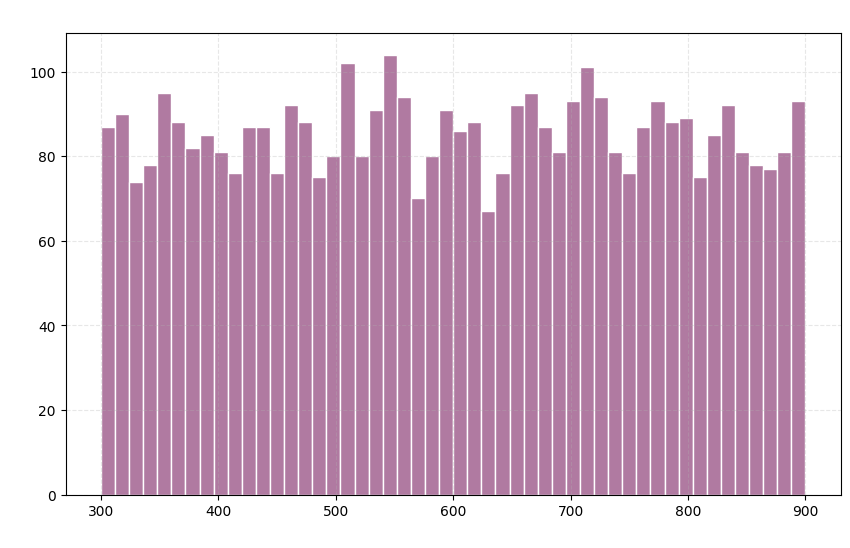

In [25]:
# Q8

#show Distribution for Score

plt.figure(figsize=(10, 6))
plt.hist(df[' cibil_score'], bins=50, color='#B07AA1', edgecolor='white')
plt.title(' cibil_score Distribution of Customers', fontsize=14, color='white')
plt.xlabel(' cibil_score', color='white')
plt.ylabel('Frequency', color='white')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

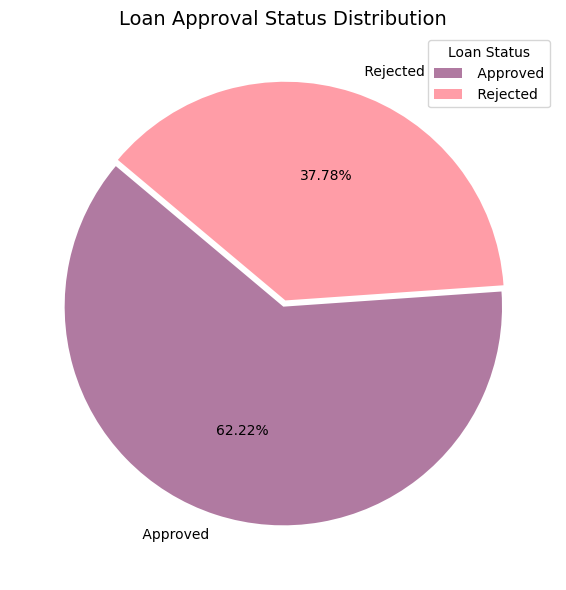

In [28]:
# Q9

# 📊 Analyze the target variable: Loan Status

# Define consistent color palette
colors = ['#B07AA1', '#FF9DA7']
explode = (0, 0.03)  # Slightly "explode" the second slice for emphasis

plt.figure(figsize=(8, 6))

# Fix column name if it contains a leading space
target_col = 'loan_status'  # <- adjust this if the actual column name has spaces
df.columns = df.columns.str.strip()  # remove accidental leading/trailing spaces

# Plot pie chart of loan status distribution
plt.pie(
    df[target_col].value_counts().values,
    labels=df[target_col].value_counts().index,
    colors=colors[:df[target_col].nunique()],
    explode=explode,
    autopct="%1.2f%%",
    startangle=140
)

plt.title('Loan Approval Status Distribution', fontsize=14)
plt.legend(title="Loan Status")
plt.tight_layout()
plt.show()

# ##
# Q9 (or similar cell)
# Define categorical columns
categorical = ["education", "self_employed", "no_of_dependents"]

# Define numerical columns (place here or just before Q10)
numerical = [
    "income_annum", "loan_amount", "loan_term", "cibil_score",
    "residential_assets_value", "commercial_assets_value",
    "luxury_assets_value", "bank_asset_value"
]



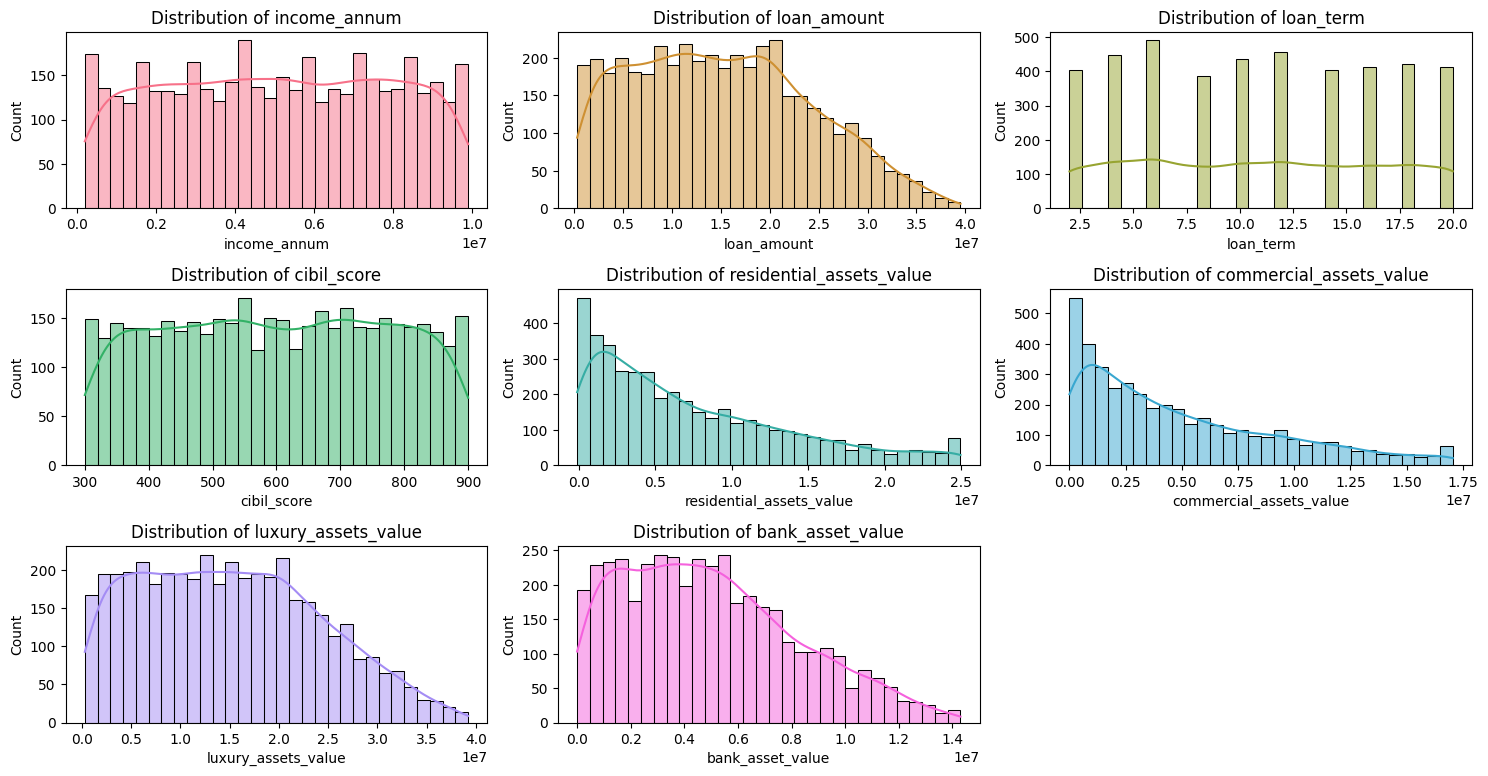

In [47]:
# Q10

# 📈 Visualize distribution of all numerical columns

# Define a unique color palette for the histograms
palette = sns.color_palette("husl", len(numerical))

plt.figure(figsize=(15, 10))

# Plot distribution for each numerical column
for idx, col in enumerate(numerical, start=1):
    plt.subplot(4, 3, idx)
    sns.histplot(df[col], kde=True, color=palette[idx - 1], bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


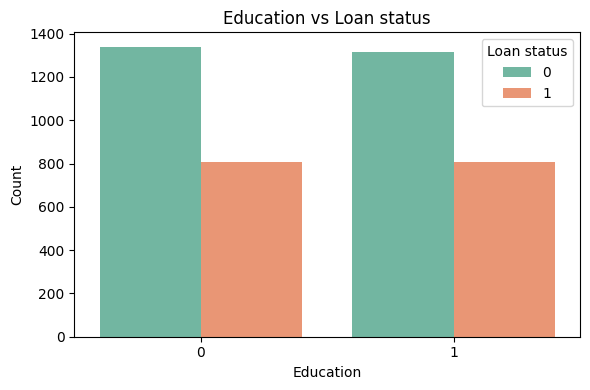

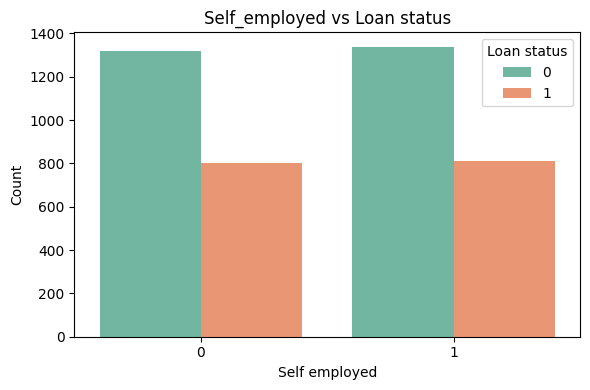

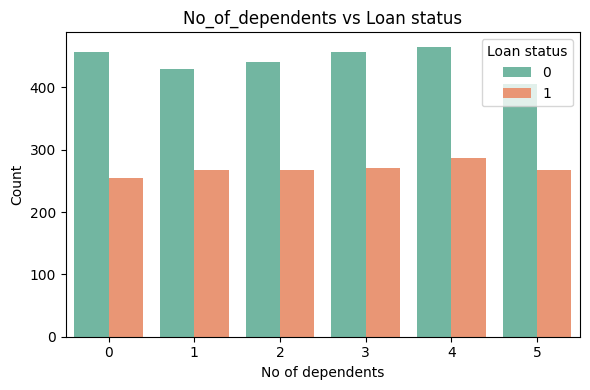

In [46]:
# Q11


# 🔄 Relationship between target variable and categorical features

# Ensure column names are stripped of extra spaces
df.columns = df.columns.str.strip()

# Define target column
target_col = "loan_status"

# List of categorical features to analyze
categorical_cols = ["education", "self_employed", "no_of_dependents"]

# Plot count distribution of each categorical feature against the target
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue=target_col, data=df, palette="Set2")
    plt.title(f"{col.capitalize()} vs {target_col.replace('_', ' ').capitalize()}")
    plt.xlabel(col.replace('_', ' ').capitalize())
    plt.ylabel("Count")
    plt.legend(title=target_col.replace('_', ' ').capitalize())
    plt.tight_layout()
    plt.show()


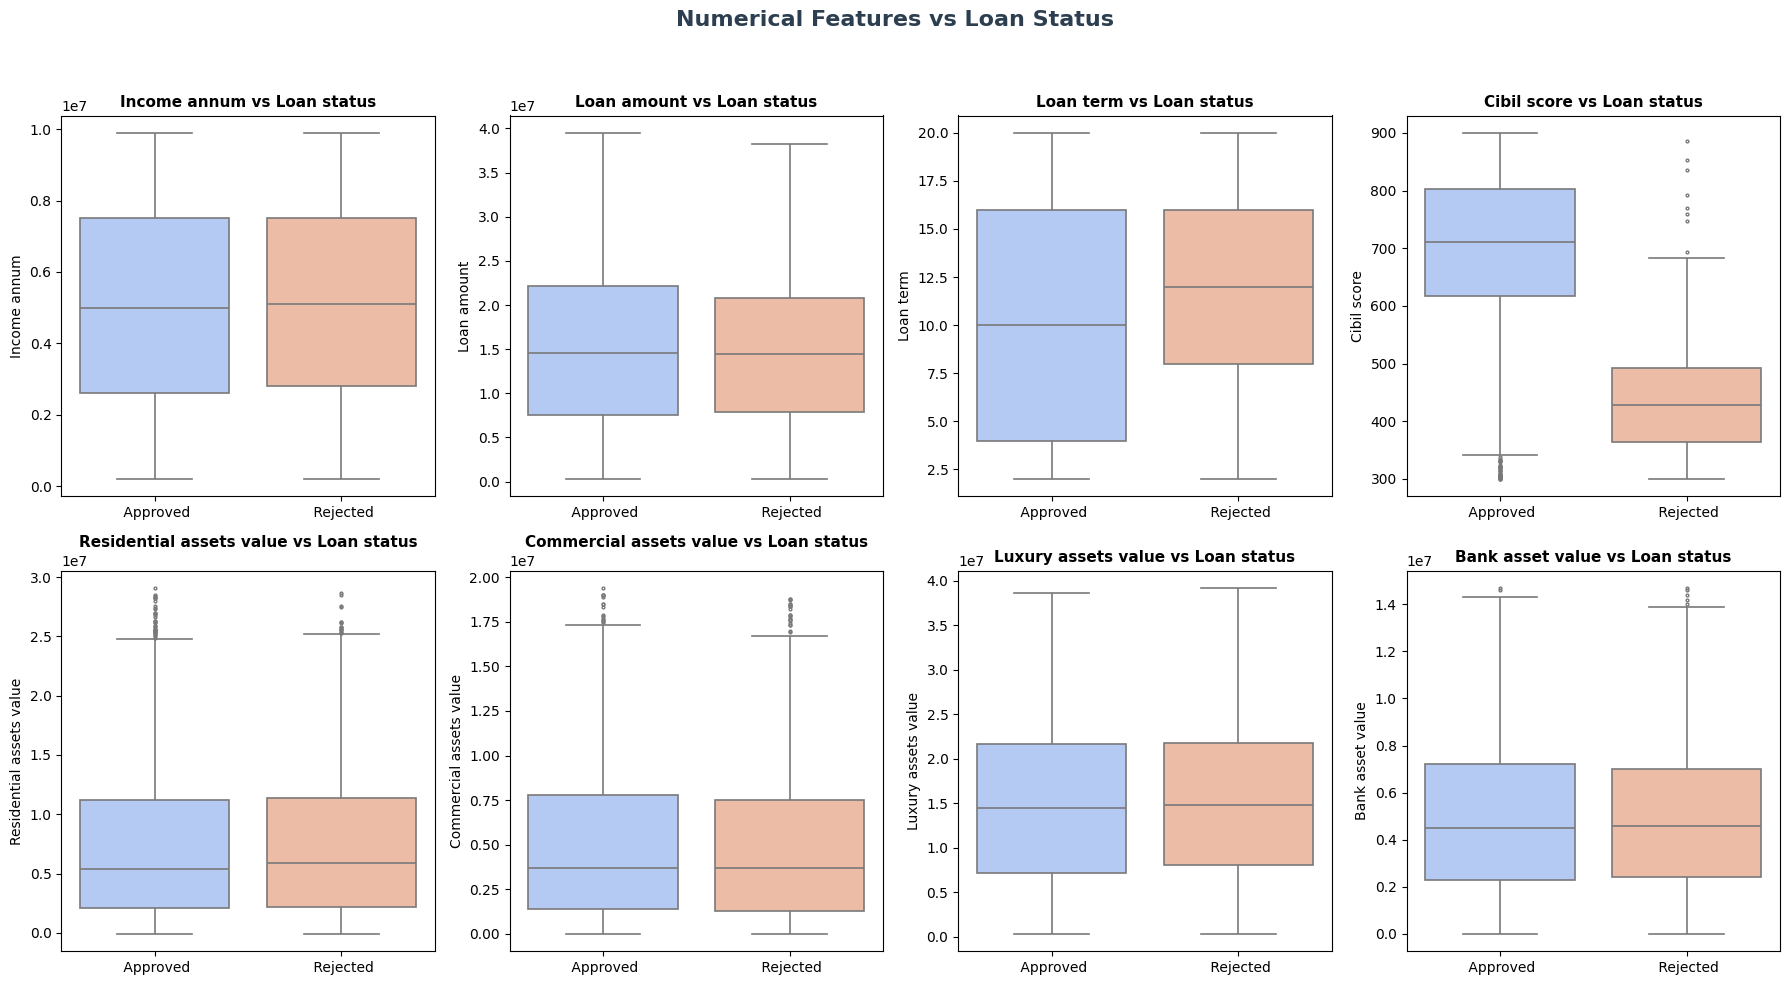

In [31]:
# Q12

# 📊 Relationship between target variable and numerical features using boxplots

# List of numerical columns to analyze
numerical_cols = [
    "income_annum", "loan_amount", "loan_term", "cibil_score",
    "residential_assets_value", "commercial_assets_value",
    "luxury_assets_value", "bank_asset_value"
]

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axes = axes.flatten()

# Plot boxplots for each numerical feature grouped by target class
for i, col in enumerate(numerical_cols):
    sns.boxplot(
        data=df,
        x=target_col,
        y=col,
        ax=axes[i],
        palette="coolwarm",
        fliersize=2,
        linewidth=1.2
    )
    axes[i].set_title(f"{col.replace('_', ' ').capitalize()} vs {target_col.replace('_', ' ').capitalize()}", fontsize=11, fontweight="bold")
    axes[i].set_xlabel("")  # Remove x-label for cleaner look
    axes[i].set_ylabel(col.replace('_', ' ').capitalize(), fontsize=10)

# Add overall title for the figure
plt.suptitle("Numerical Features vs Loan Status", fontsize=16, fontweight="bold", color="#2c3e50")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [45]:
# Q13

# 🧹 Outlier treatment using the IQR method (clipping)

def remove_outliers_iqr(df, column):
    """
    Clip outliers in a numerical column based on the IQR method.
    Values below Q1 - 1.5*IQR are set to the lower bound,
    values above Q3 + 1.5*IQR are set to the upper bound.

    Parameters:
        df (pd.DataFrame): The dataframe to process
        column (str): Column name to apply outlier clipping

    Returns:
        pd.DataFrame: DataFrame with outliers clipped in the specified column
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values outside the bounds to the bounds themselves
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df


# List of numerical columns to process
num_cols = [
    'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
    'cibil_score', 'residential_assets_value',
    'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'
]

# Apply outlier clipping for each numerical column
for col in num_cols:
    df = remove_outliers_iqr(df, col)


In [34]:
# Q15

# 🔤 Encode categorical variables using Label Encoding

from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['education', 'self_employed', 'loan_status']  # loan_status is the target

# Apply label encoding for each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [35]:
# Q16

# 🎯 Split dataset into training and testing sets

# Separate features and target variable
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Split data: 80% train, 20% test; stratify to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display the shape of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Training set shape: (3415, 12)
Testing set shape: (854, 12)


In [36]:
# Q17

# 🌲 Train a Random Forest Classifier

# Initialize the model with a fixed random state for reproducibility
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [37]:
# Q18

# 📊 Evaluate the Random Forest model on the test set

# Predict the target for test data
y_pred = model.predict(X_test)

# Calculate and display accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))


Accuracy: 0.9800936768149883
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.99      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [43]:
# Q19

# ⚖️ Handling Class Imbalance with SMOTE (Synthetic Minority Over-sampling Technique)

# Uncomment the lines below to apply SMOTE for balancing classes in training data

from imblearn.over_sampling import SMOTE

# Initialize SMOTE with a fixed random state for reproducibility
sm = SMOTE(random_state=42)

# Generate synthetic samples for minority class
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Print class distribution before and after applying SMOTE
print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_resampled.value_counts().to_dict())


Before SMOTE: {0: 2125, 1: 1290}
After SMOTE: {1: 2125, 0: 2125}


In [39]:
# Q20

# 🚦 Train and evaluate Logistic Regression model

# Initialize Logistic Regression with increased max iterations and fixed random state
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on training data
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log = log_reg.predict(X_test)

# Print performance metrics
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))



=== Logistic Regression ===
Accuracy: 0.810304449648712
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       531
           1       0.82      0.64      0.72       323

    accuracy                           0.81       854
   macro avg       0.81      0.78      0.79       854
weighted avg       0.81      0.81      0.80       854



In [40]:
# Q21

# 🌳 Train a Decision Tree Classifier

# Initialize the Decision Tree with a max depth to control complexity and fixed random state
tree = DecisionTreeClassifier(max_depth=6, random_state=42)

# Fit the model on the training data
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, random_state=42)

In [44]:
# Q22

# 📈 Evaluate the Decision Tree model on the test set

# Predict target values for test data
y_pred_tree = tree.predict(X_test)

# Display accuracy and detailed classification metrics
print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


=== Decision Tree ===
Accuracy: 0.9695550351288056
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       531
           1       0.98      0.93      0.96       323

    accuracy                           0.97       854
   macro avg       0.97      0.96      0.97       854
weighted avg       0.97      0.97      0.97       854



⚙️ How each model works 1.Logistics Regression Mechanism of action: It calculates a linear relationship between the Features and the Target.


It uses a logistic function (Sigmoid) to convert the result to a probability between 0 and 1.


It makes a decision based on a threshold (threshold = 0.5 often).


Its features: ✅ Simple and easy to explain. ✅ Very fast. ✅ It is useful if there is a clear linear relationship between the variables.


Disadvantages: ❌ Weak with non-linear data. ❌ It is very affected by class imbalance


Decision Tree Mechanism of action: It divides the data gradually (splits) according to values ​​that reduce impurity (such as Gini or Entropy).
In the end, he creates a tree with paths that lead to the final classification.


Its features: ✅ Deals with non-linear relationships well. ✅ Understands the interactions between variables. ✅ Easy to interpret (if the tree is small).


Disadvantages: ❌ Overfitting may occur (memorizes data instead of learning it). ❌ Sensitive to small changes in data.



📊 Model Performance Summary

Model	Accuracy	Precision (Class 0)	Recall (Class 0)	F1-Score (Class 0)	Precision (Class 1)	Recall (Class 1)	F1-Score (Class 1)
Logistic Regression	81.0%	0.81	0.91	0.86	0.82	0.64	0.72
Decision Tree	96.96%	0.96	0.99	0.98	0.98	0.93	0.96

🔍 Insights


Decision Tree clearly outperforms Logistic Regression in all key metrics, achieving nearly 97% accuracy.


The Decision Tree model has better balance between precision and recall for both classes, indicating stronger and more reliable predictions.


Logistic Regression shows good performance on class 0 but lower recall on class 1, which suggests it misses some positive loan approvals.


Considering these results, the Decision Tree is the preferred model for predicting loan approval in this dataset.